In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
from sklearn import linear_model
import pickle
import math
import pandas as pd
# ensures matplotlib figures appear in jupyter itself
%matplotlib inline

In [25]:
train = open('./train.pkl', 'rb') # read mode + binary mode
train_data = pickle.load(train)
train.close()
# shuffling the data
np.random.shuffle(train_data)

(8000, 2)
(8000,)
(8000,)


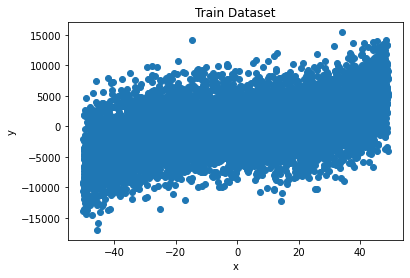

In [26]:
print(train_data.shape)
X_train = train_data[:,0]
Y_train = train_data[:,1]
print(X_train.shape)
print(Y_train.shape)
plt.scatter(X_train,Y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Dataset')
plt.show()

(80, 2)
(80,)
(80,)


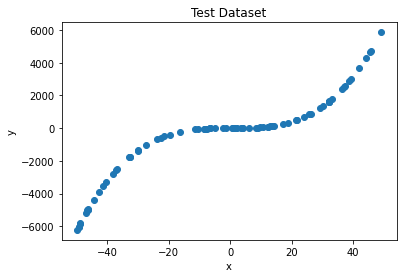

In [27]:
test = open('./test.pkl', 'rb') # read mode + binary mode
test_data = pickle.load(test)
test.close()

print(test_data.shape)
X_test = test_data[:,0]
Y_test = test_data[:,1]
print(X_test.shape)
print(Y_test.shape)
plt.scatter(X_test,Y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Dataset')
plt.show()

In [28]:
partitions = 10
partitionX = np.array_split(X_train,partitions)
partitionY = np.array_split(Y_train,partitions)

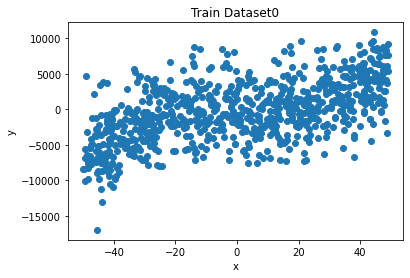

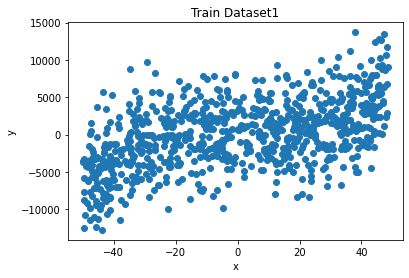

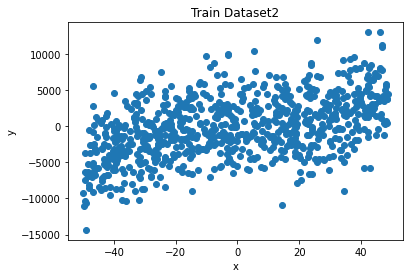

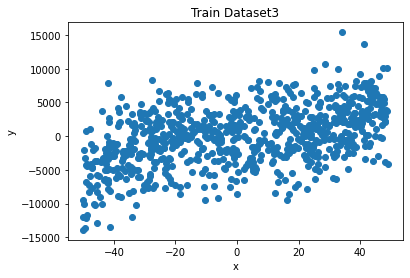

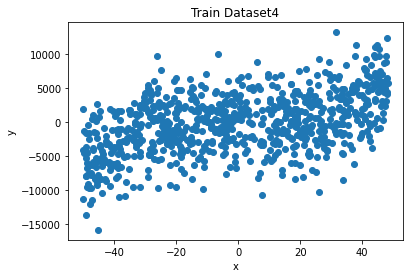

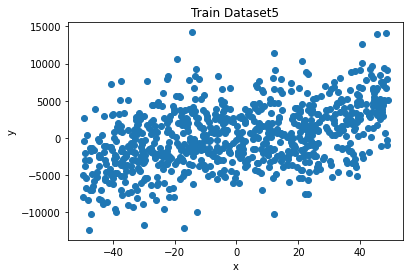

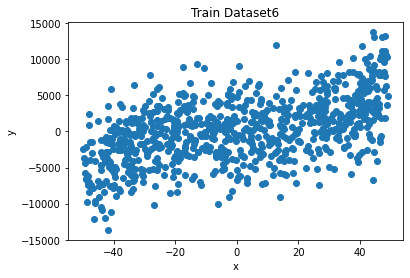

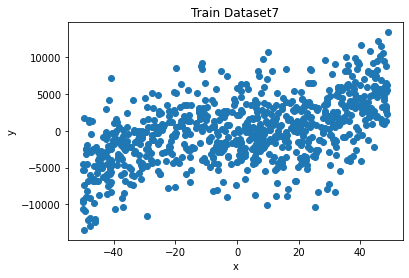

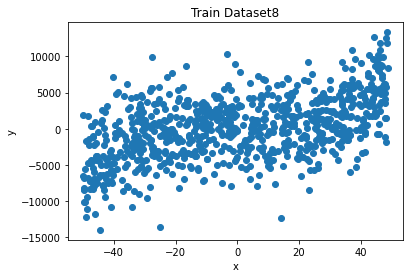

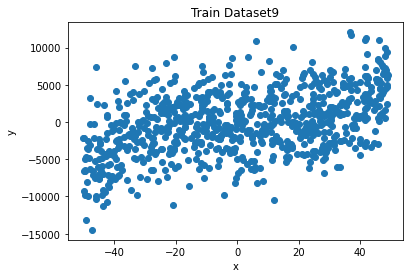

In [29]:
for i in range(0,10):
    plt.scatter(partitionX[i], partitionY[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Train Dataset'+str(i))
    plt.show()

In [30]:
# for all 20 polynomials(models)
errors = list()
bias_square = list()
bias = list()
variance = list()

In [31]:
X_test.reshape(-1,1).shape

(80, 1)

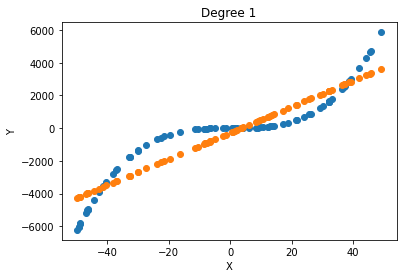

predict shape is 10
errors shape is 1
variance shape is 1


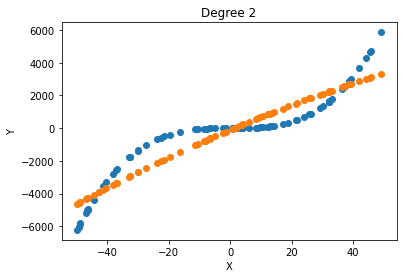

predict shape is 10
errors shape is 2
variance shape is 2


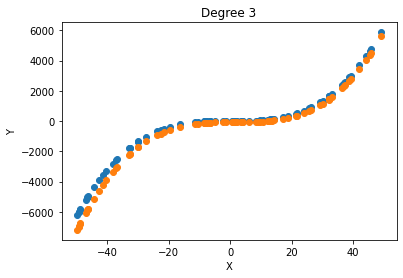

predict shape is 10
errors shape is 3
variance shape is 3


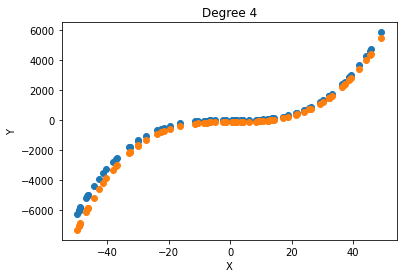

predict shape is 10
errors shape is 4
variance shape is 4


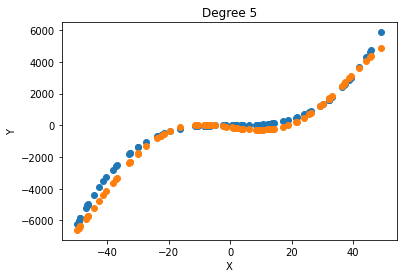

predict shape is 10
errors shape is 5
variance shape is 5


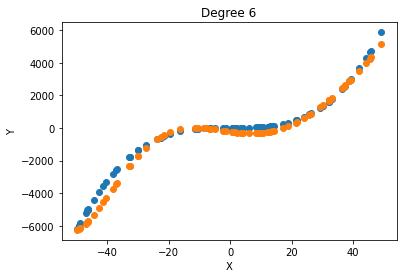

predict shape is 10
errors shape is 6
variance shape is 6


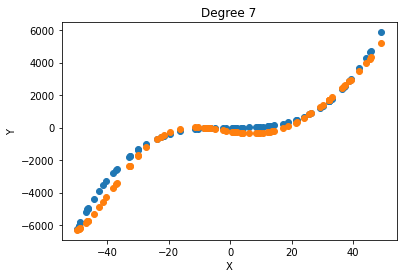

predict shape is 10
errors shape is 7
variance shape is 7


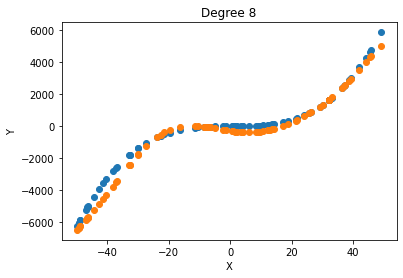

predict shape is 10
errors shape is 8
variance shape is 8


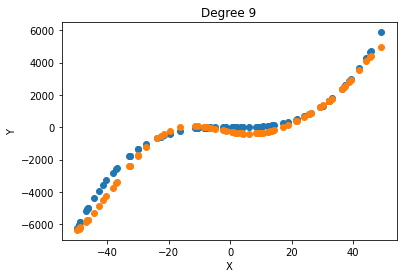

predict shape is 10
errors shape is 9
variance shape is 9


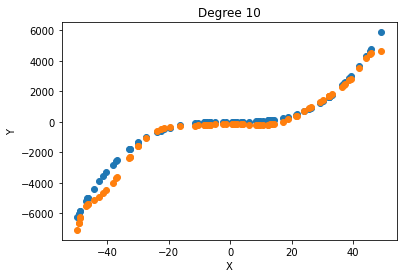

predict shape is 10
errors shape is 10
variance shape is 10


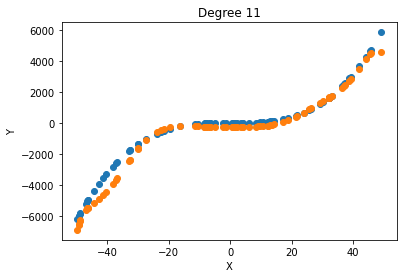

predict shape is 10
errors shape is 11
variance shape is 11


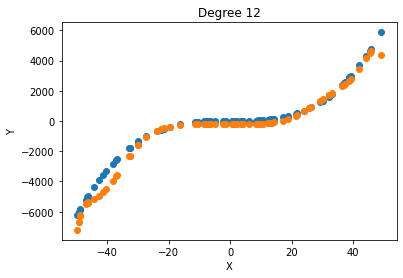

predict shape is 10
errors shape is 12
variance shape is 12


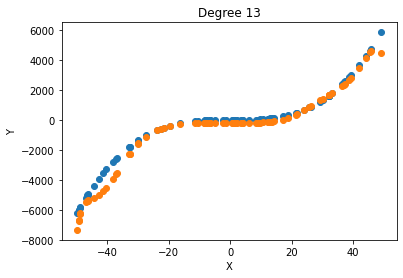

predict shape is 10
errors shape is 13
variance shape is 13


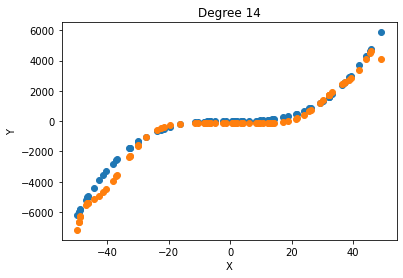

predict shape is 10
errors shape is 14
variance shape is 14


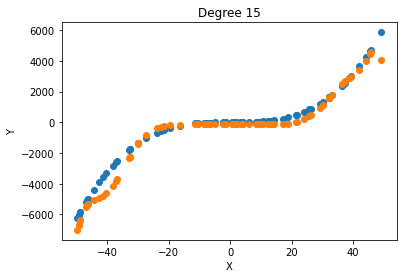

predict shape is 10
errors shape is 15
variance shape is 15


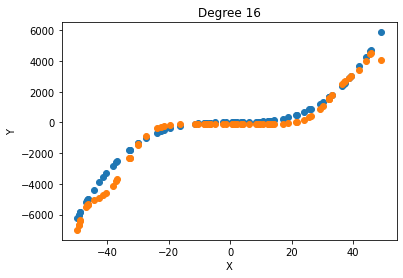

predict shape is 10
errors shape is 16
variance shape is 16


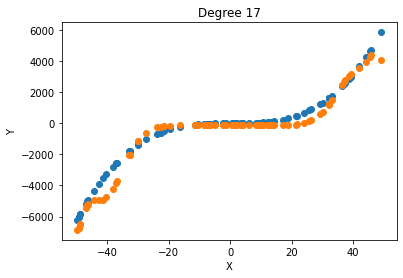

predict shape is 10
errors shape is 17
variance shape is 17


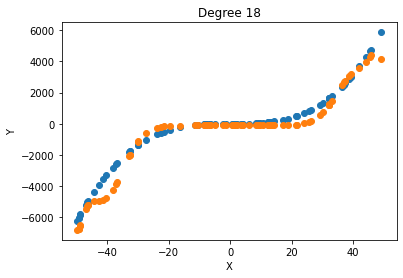

predict shape is 10
errors shape is 18
variance shape is 18


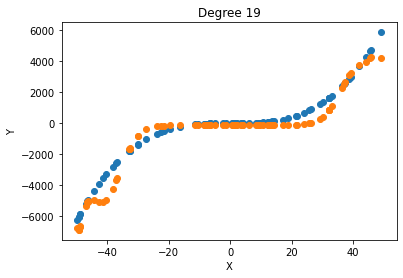

predict shape is 10
errors shape is 19
variance shape is 19


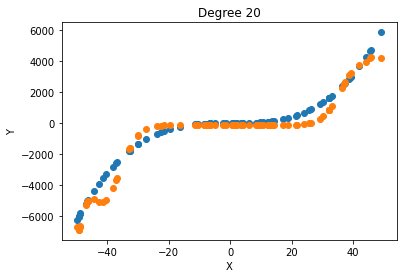

predict shape is 10
errors shape is 20
variance shape is 20


In [32]:
for i in range(1,21):
    predict = list()
    diffs = list()
    error = list()
    diffs_abs = list()

    poly = PolynomialFeatures(degree = i)
    test_X = poly.fit_transform(X_test.reshape(-1,1))
    # test_Y = Y_test.reshape(-1,1)
    # test_Y = Y_test

# create different model for every partition
    for j in range(partitions):
        
        train_X = poly.fit_transform(partitionX[j].reshape(-1,1))
        
        regressor = linear_model.LinearRegression()
        regressor.fit(train_X,partitionY[j])
        
        prediction = regressor.predict(test_X)

        diffs.append(prediction - Y_test)
        diffs_abs.append(abs(prediction - Y_test))
        predict.append(prediction)
        error.append(mean_squared_error(Y_test,prediction))

        if j == 0:
        # make a plot for this model using the 1st partitions
            plt.figure(i)
            plt.scatter(X_test, Y_test, label='Actual Data')
            plt.scatter(X_test, prediction, label='Predicted Data')
            plt.xlabel("X") 
            plt.ylabel("Y") 
            plt.title('Degree ' + str(i))
            plt.show(i)

    print("predict shape is "+ str(len(predict)))
    errors.append(np.mean(error))
    print("errors shape is "+ str(len(errors)))
    
    diffs = np.array(diffs)
    diffs = np.transpose(diffs)

    diffs_abs = np.array(diffs_abs)
    diffs_abs = np.transpose(diffs_abs)

    predict = np.array(predict)
    bias_abs = np.mean(np.mean(diffs_abs,1))
    bias_sq = np.mean(np.mean(diffs,1)**2)

    bias_square.append(bias_sq)
    bias.append(bias_abs)

    variance.append(np.mean((predict - np.mean(predict,0))**2))
    print("variance shape is "+ str(len(variance)))

    Degree        Errors        Bias       Variance  Irreducible Error
0        1  1.056923e+06  834.474907   51994.979434       0.000000e+00
1        2  1.032068e+06  828.628868   74130.146184      -1.164153e-10
2        3  8.031461e+04  204.481440   73346.365204       0.000000e+00
3        4  1.140164e+05  232.277952  107179.517277       0.000000e+00
4        5  1.224180e+05  239.151253  115914.097150      -1.455192e-11
5        6  1.533543e+05  271.692786  147325.200686      -2.910383e-11
6        7  1.642627e+05  285.782822  157063.767120       0.000000e+00
7        8  2.203152e+05  318.454659  213022.052628       0.000000e+00
8        9  2.353528e+05  329.634029  227702.669551       2.910383e-11
9       10  2.496894e+05  339.306069  241819.010150       0.000000e+00
10      11  2.649836e+05  320.416548  257690.063671      -5.820766e-11
11      12  2.809375e+05  327.077252  265156.021762       0.000000e+00
12      13  2.656636e+05  311.619413  257513.151257       0.000000e+00
13    

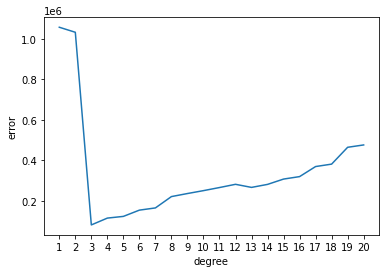

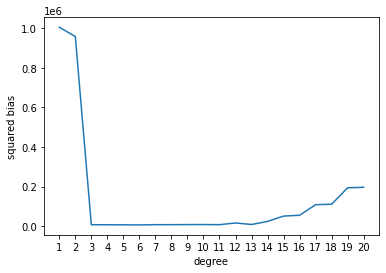

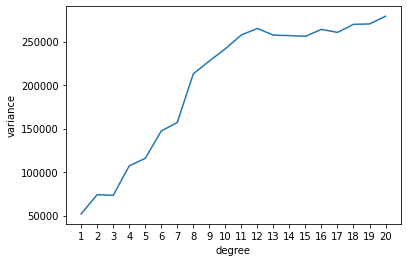

In [33]:
errors = np.array(errors)
bias_square = np.array(bias_square)
variance = np.array(variance)
irreducible_error = np.array(errors - (bias_square+variance))

df = pd.DataFrame({
    'Degree': [i for i in range(1, 21)],
    'Errors': errors,
    'Bias': bias,
    'Variance': variance,
    'Irreducible Error': irreducible_error
})

print(df)
# table_dict = {
#     'Degree': [i for i in range(1, 21)],
#     'Errors': errors,
#     'Bias': bias,
#     'Variance': variance,
#     'Irreducible Error': irreducible_error
# }

# print(tabulate(table_dict, headers='keys', tablefmt='psql'))

plt.close()

plt.figure(21)
plt.plot(range(1,21),errors)
plt.xticks(list(range(1, 21)))
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

plt.figure(22)
plt.plot(range(1,21),bias_square)
plt.xticks(list(range(1, 21)))
plt.xlabel('degree')
plt.ylabel('squared bias')
plt.show()

plt.figure(23)
plt.plot(range(1,21),variance)
plt.xticks(list(range(1, 21)))
plt.xlabel('degree')
plt.ylabel('variance')
plt.show()

# plt.figure(24)
# plt.plot(range(1,21),irreducible_error)
# plt.xlabel('degree')
# plt.ylabel('irreducible error')
# plt.show()

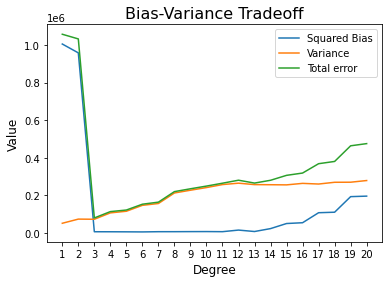

In [34]:
plt.plot(range(1, 21), bias_square, label='Squared Bias')
plt.plot(range(1, 21), variance, label='Variance')
plt.plot(range(1, 21), bias_square+ variance, label='Total error')
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Bias-Variance Tradeoff', fontsize=16)
plt.xticks(list(range(1, 21)))
plt.legend()